In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

Processing 3D data for scan 125...


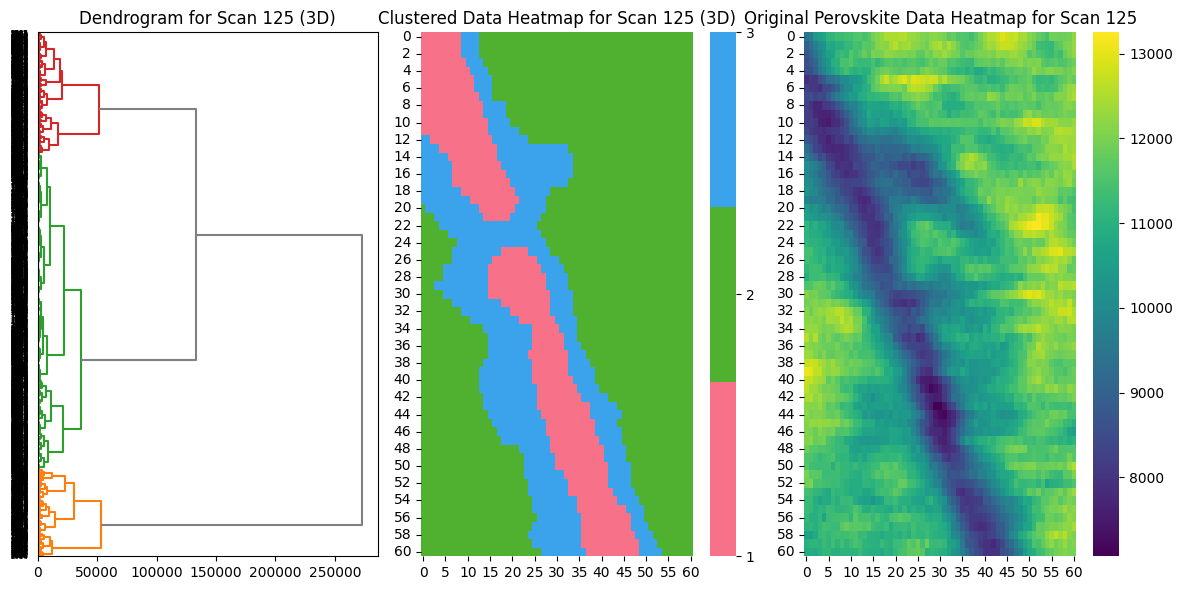

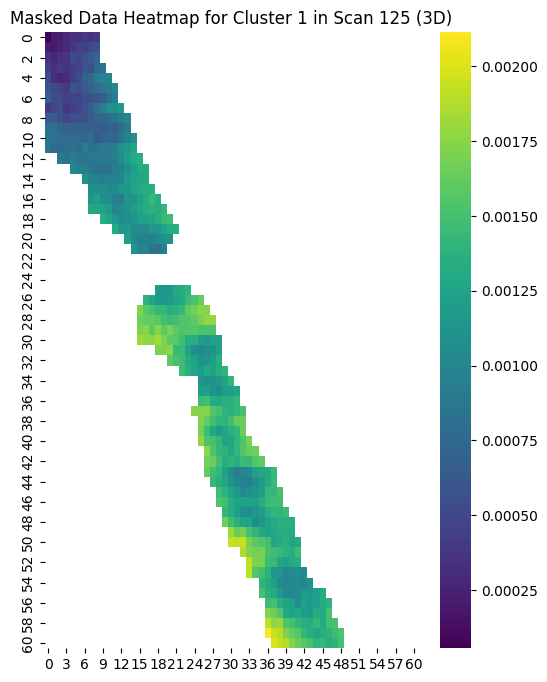

The mean value of the masked data for Cluster 1 in Scan 125 (3D) is: 1.1808e-03


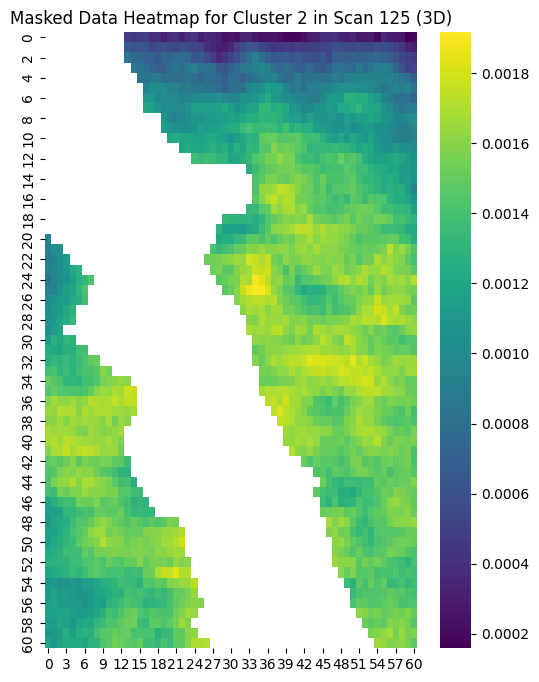

The mean value of the masked data for Cluster 2 in Scan 125 (3D) is: 1.3493e-03


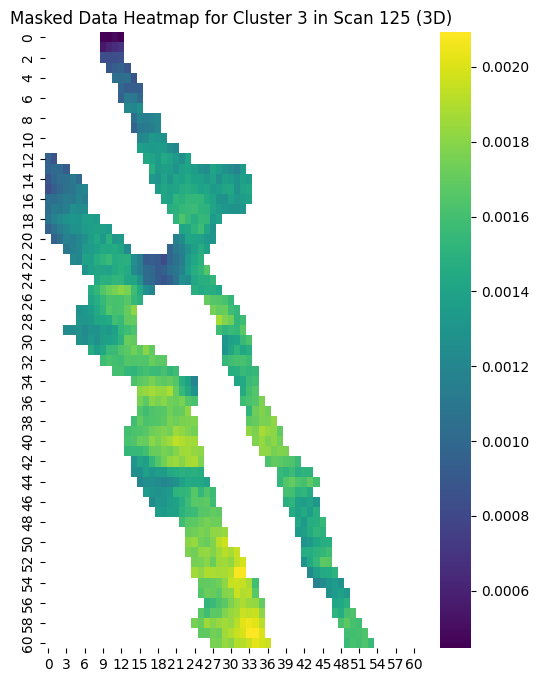

The mean value of the masked data for Cluster 3 in Scan 125 (3D) is: 1.4871e-03
Processing 5D data for scan 125...


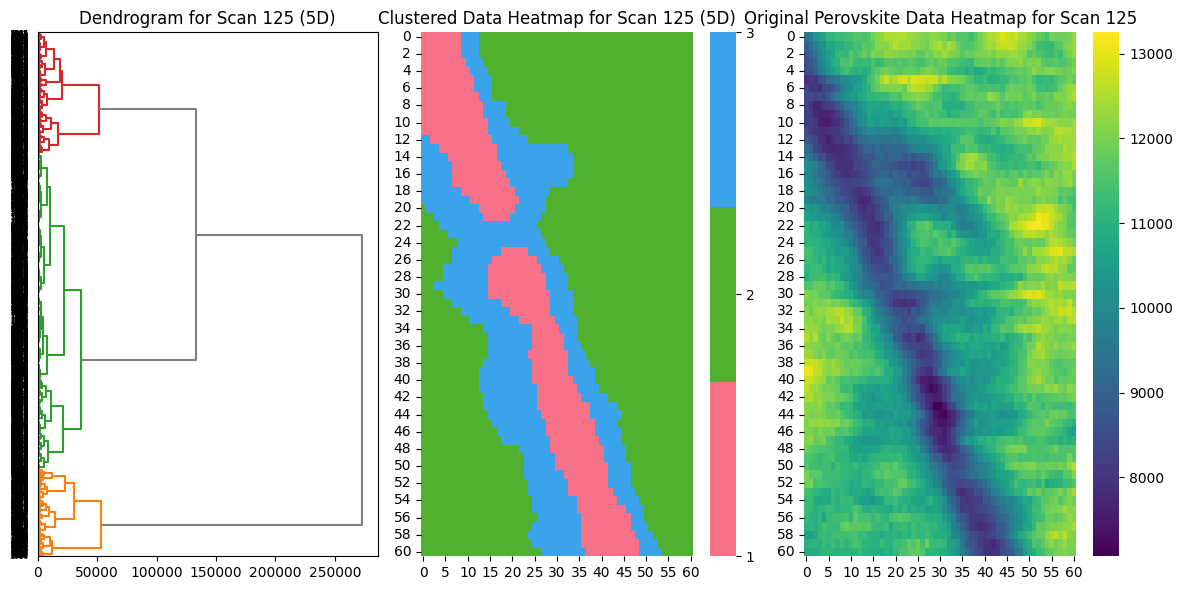

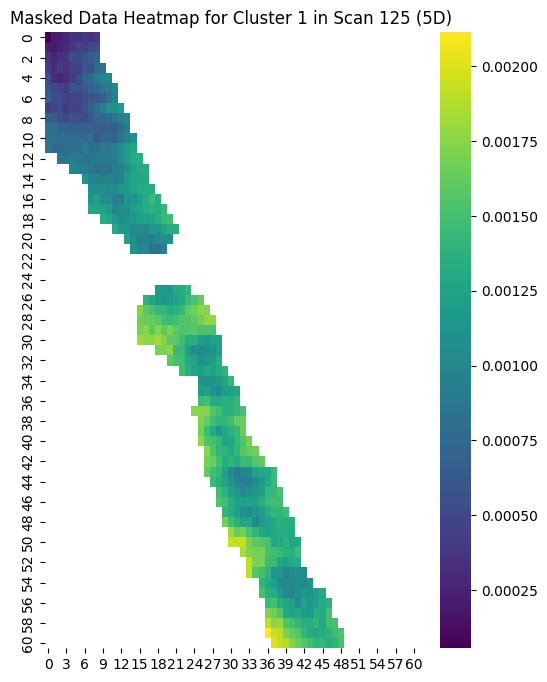

The mean value of the masked data for Cluster 1 in Scan 125 (5D) is: 1.1808e-03


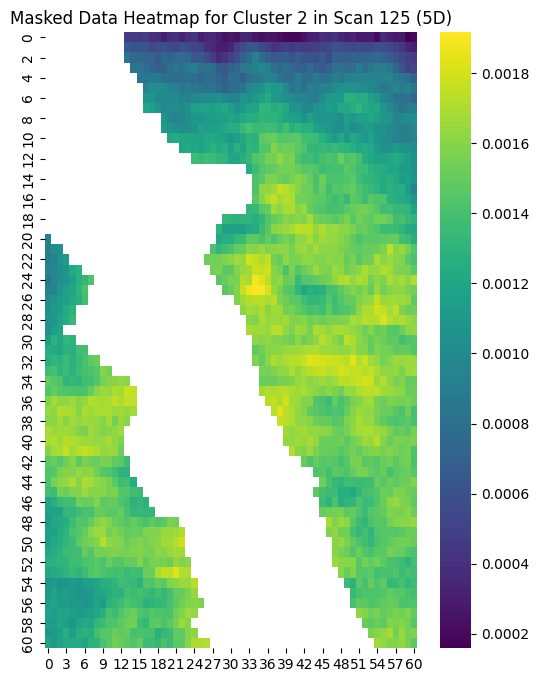

The mean value of the masked data for Cluster 2 in Scan 125 (5D) is: 1.3493e-03


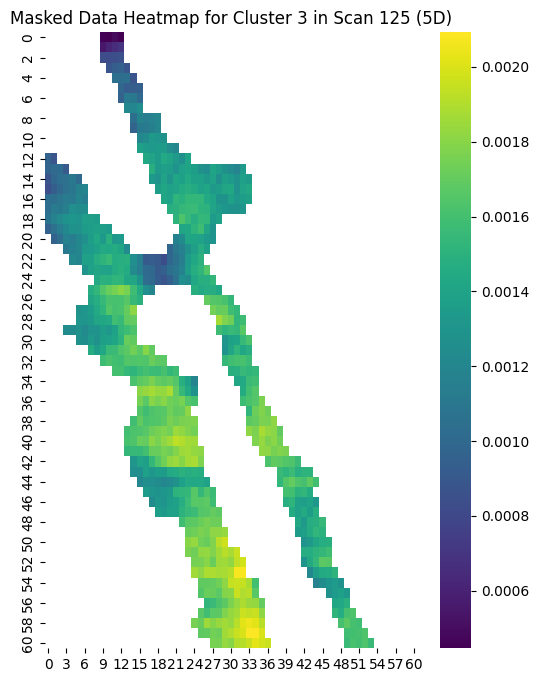

The mean value of the masked data for Cluster 3 in Scan 125 (5D) is: 1.4871e-03
Processing 3D data for scan 126...


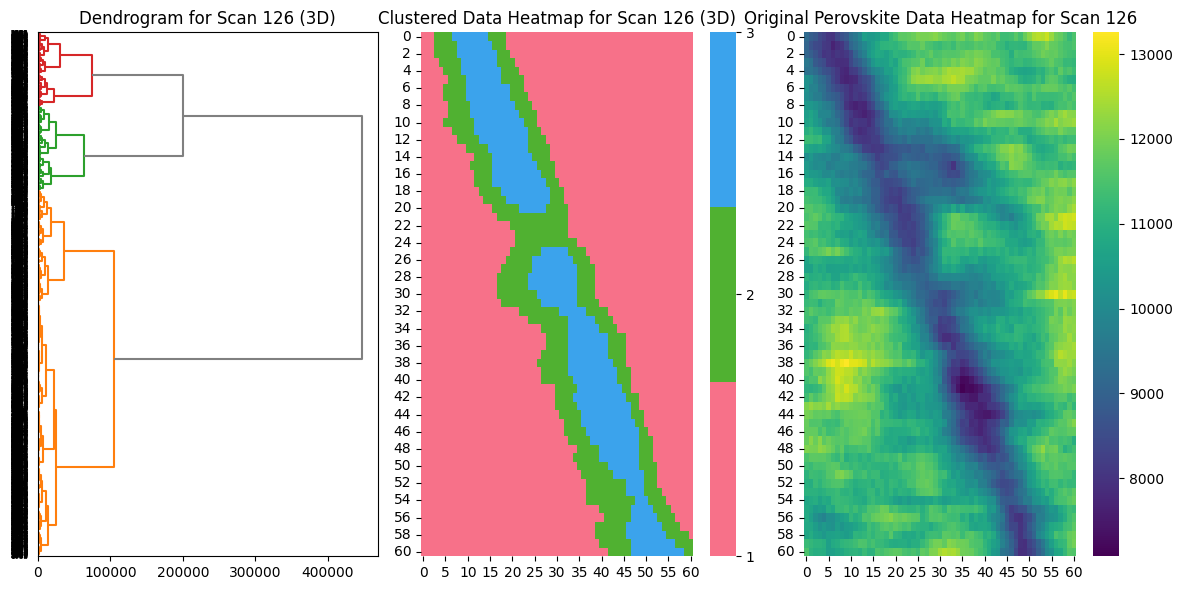

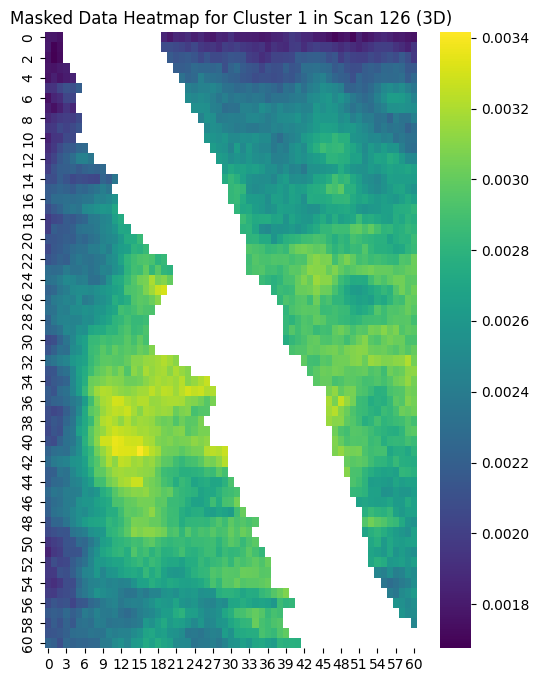

The mean value of the masked data for Cluster 1 in Scan 126 (3D) is: 2.6348e-03


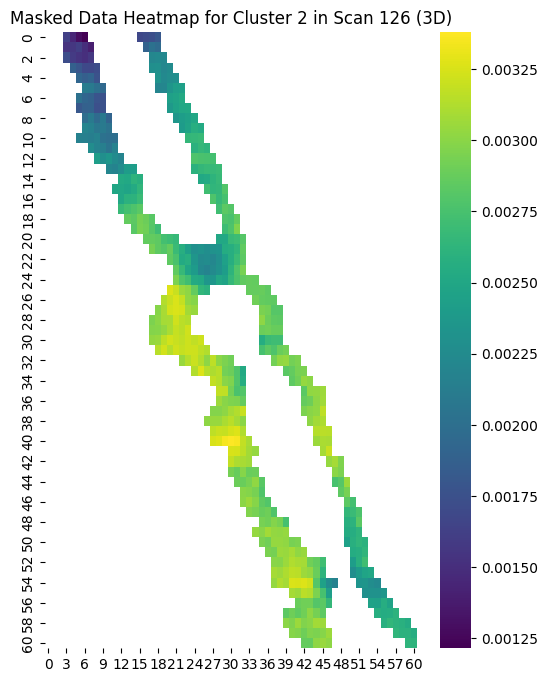

The mean value of the masked data for Cluster 2 in Scan 126 (3D) is: 2.7144e-03


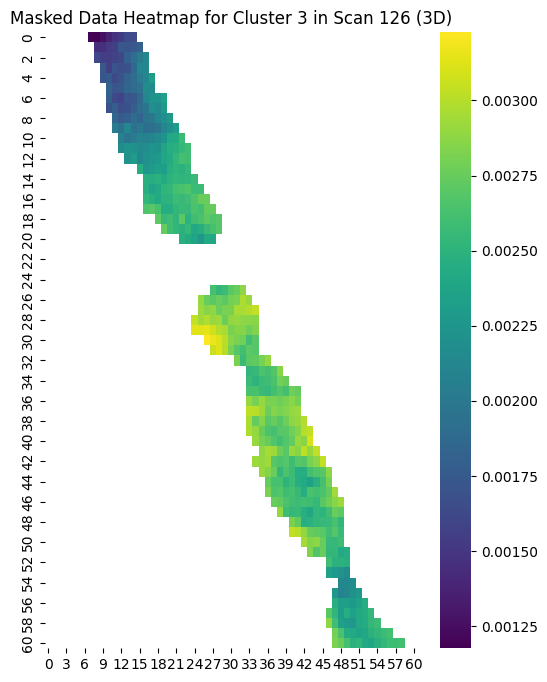

The mean value of the masked data for Cluster 3 in Scan 126 (3D) is: 2.4943e-03
Processing 5D data for scan 126...


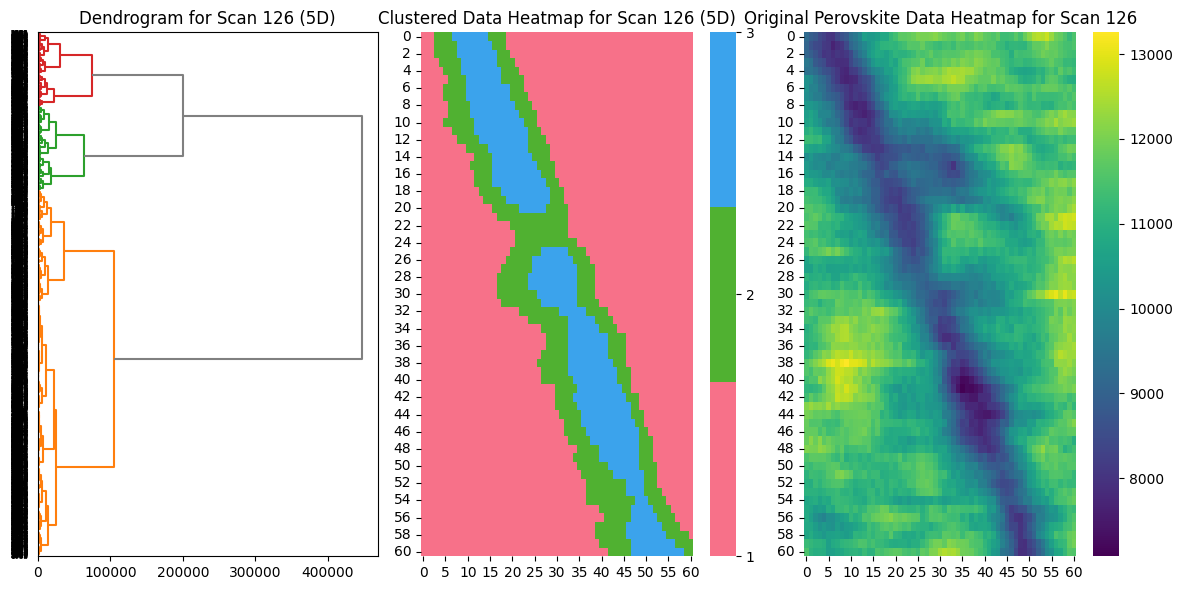

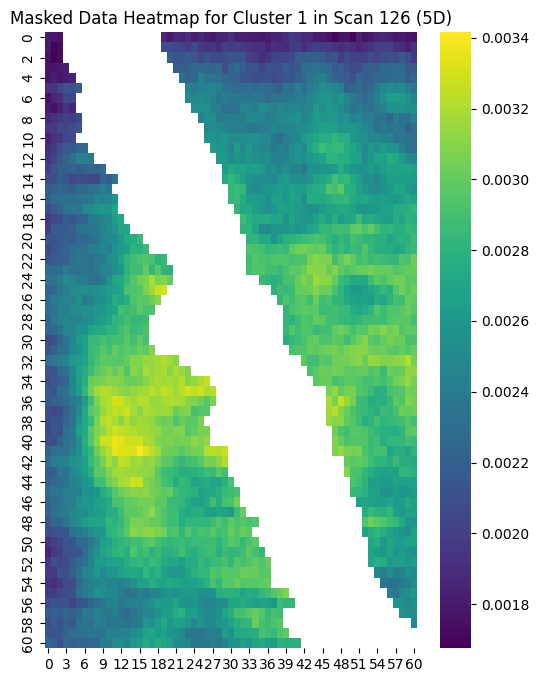

The mean value of the masked data for Cluster 1 in Scan 126 (5D) is: 2.6348e-03


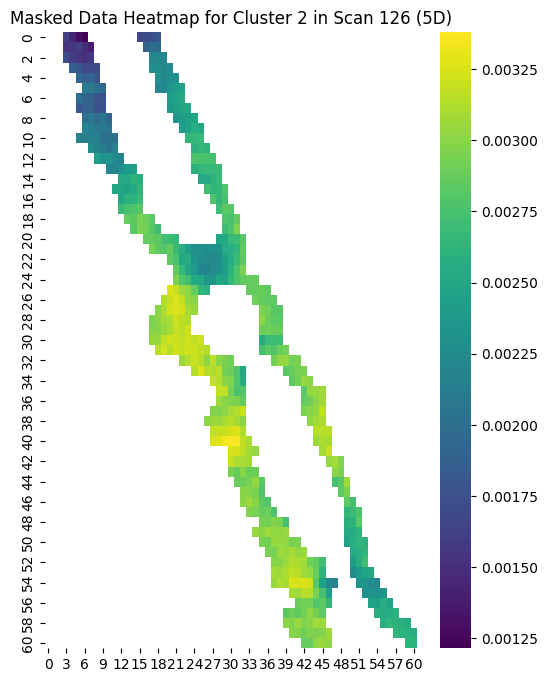

The mean value of the masked data for Cluster 2 in Scan 126 (5D) is: 2.7144e-03


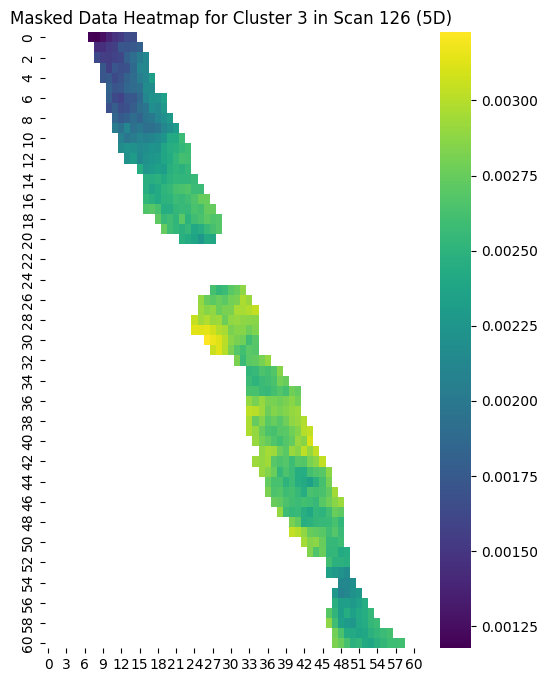

The mean value of the masked data for Cluster 3 in Scan 126 (5D) is: 2.4943e-03
Processing 3D data for scan 142...


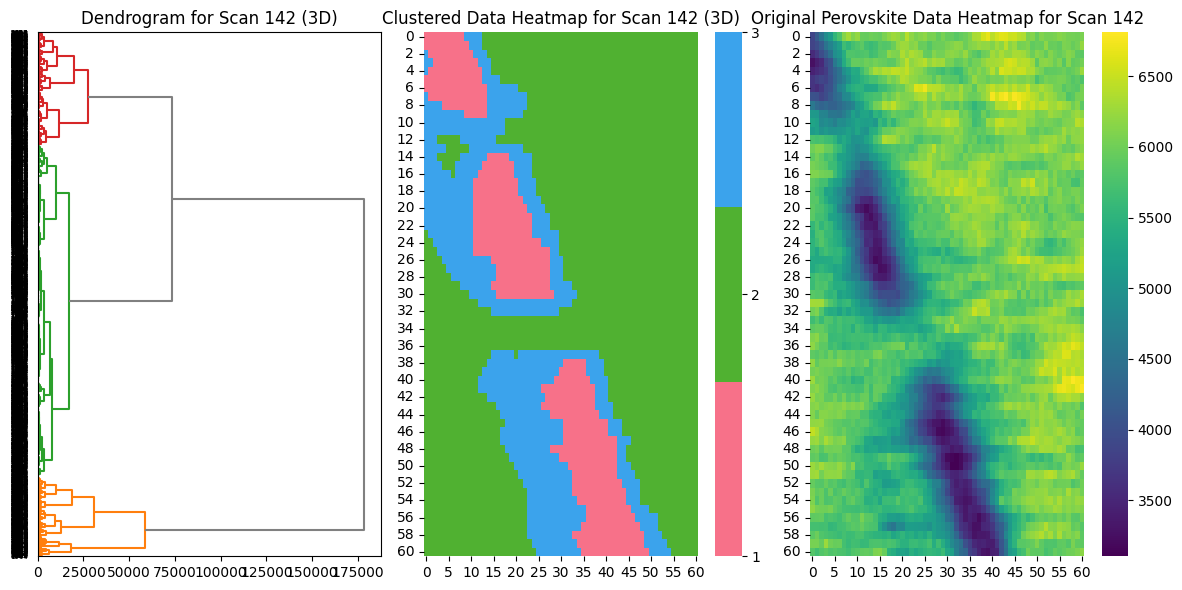

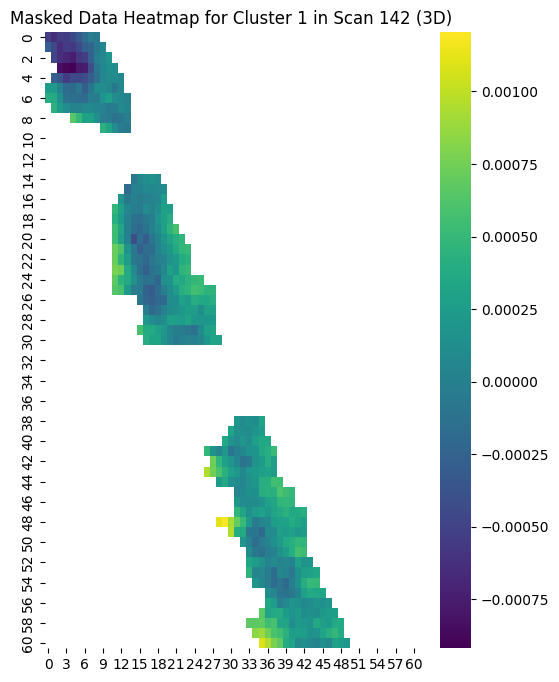

The mean value of the masked data for Cluster 1 in Scan 142 (3D) is: 1.5437e-04


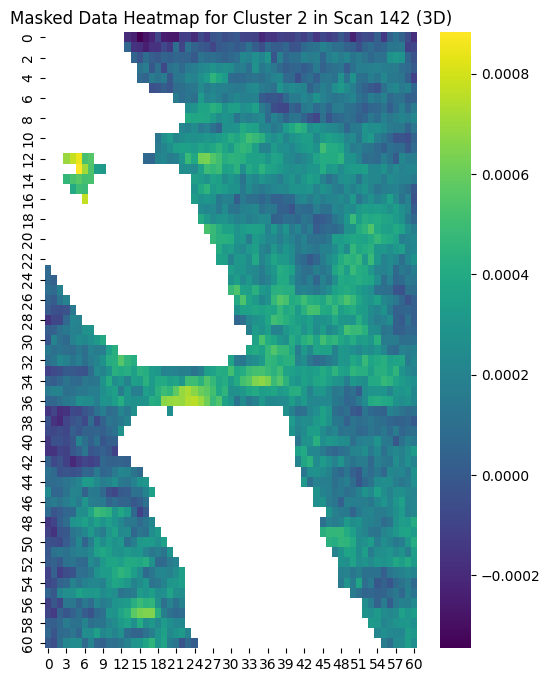

The mean value of the masked data for Cluster 2 in Scan 142 (3D) is: 2.1095e-04


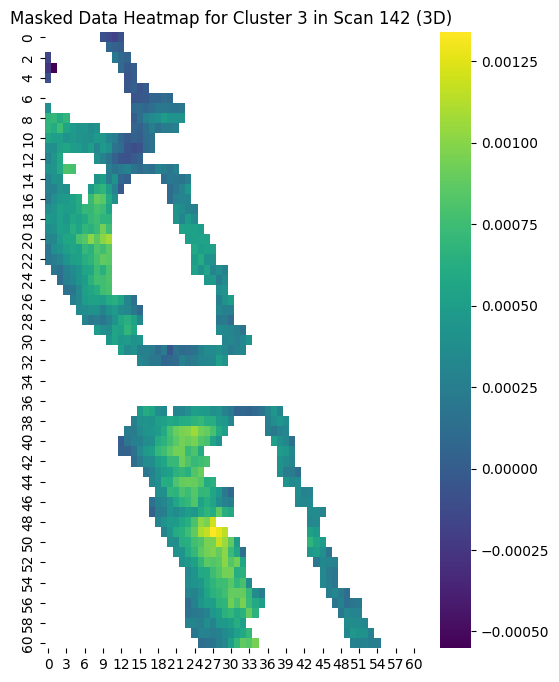

The mean value of the masked data for Cluster 3 in Scan 142 (3D) is: 4.4067e-04
Processing 5D data for scan 142...


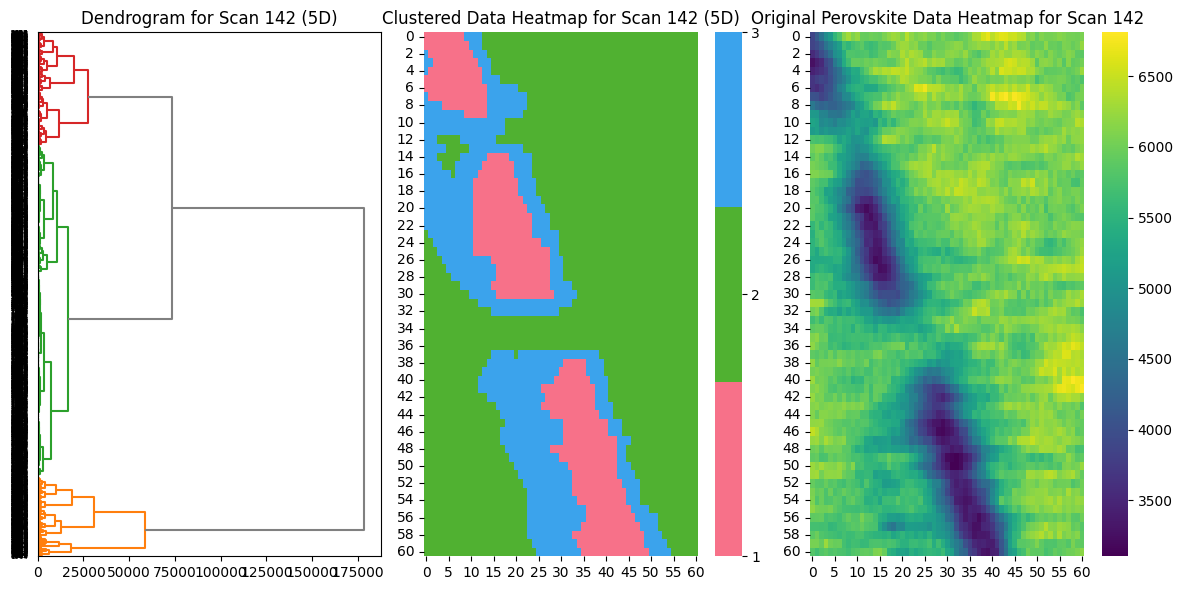

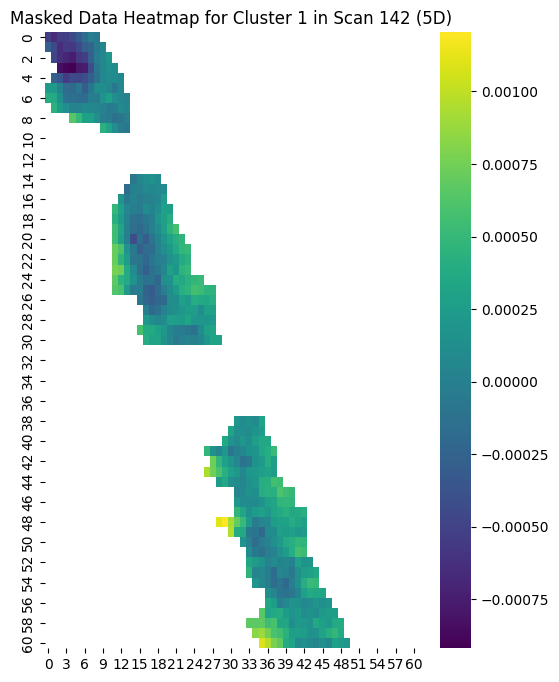

The mean value of the masked data for Cluster 1 in Scan 142 (5D) is: 1.5437e-04


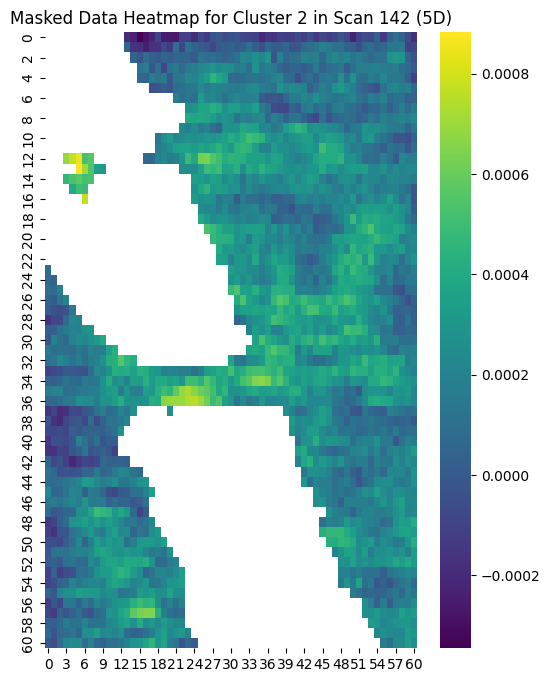

The mean value of the masked data for Cluster 2 in Scan 142 (5D) is: 2.1095e-04


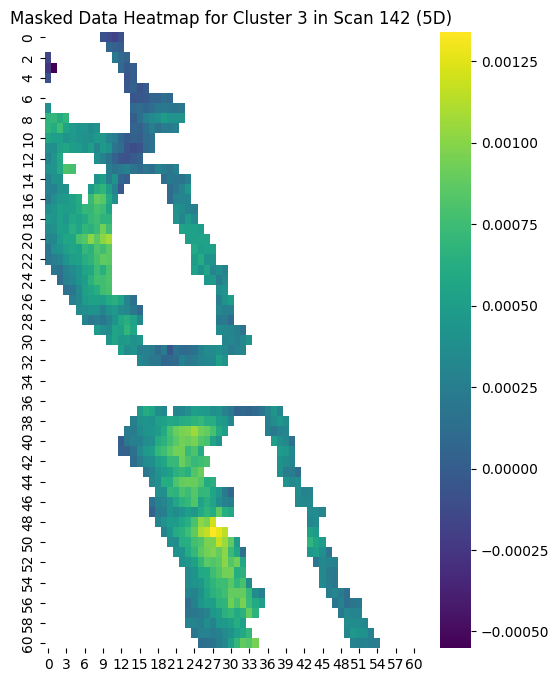

The mean value of the masked data for Cluster 3 in Scan 142 (5D) is: 4.4067e-04
Processing 3D data for scan 183...


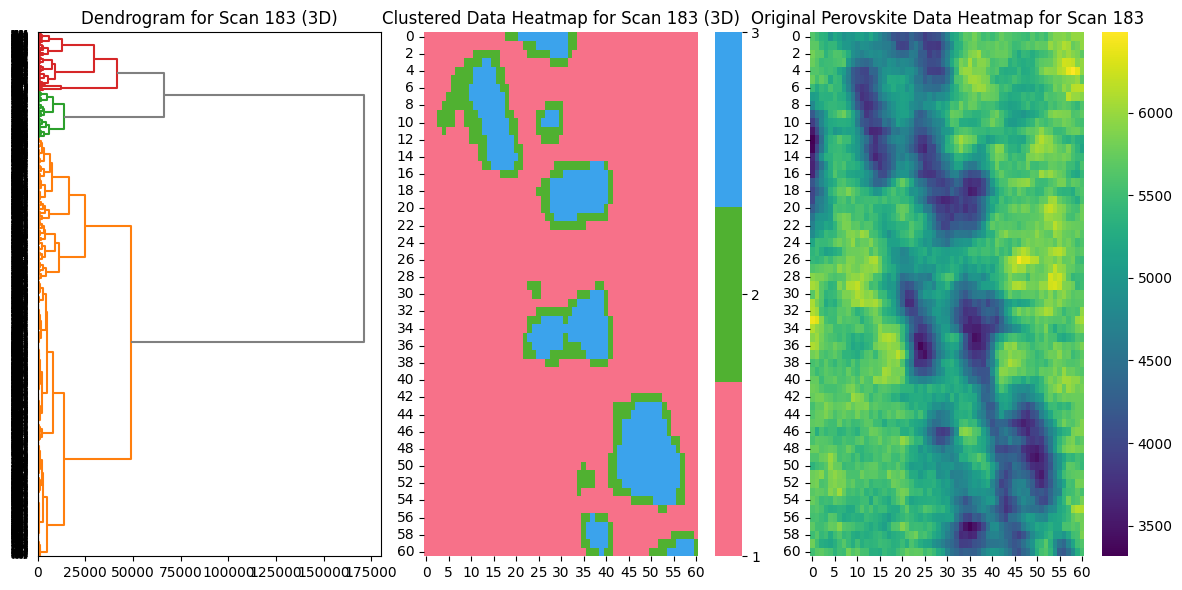

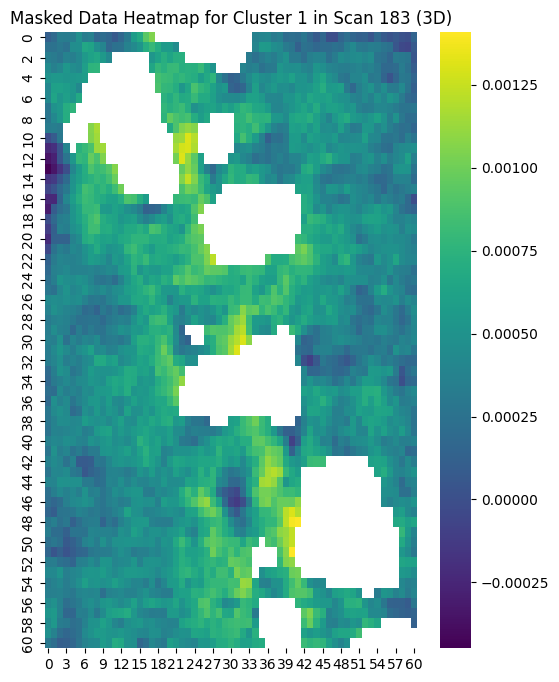

The mean value of the masked data for Cluster 1 in Scan 183 (3D) is: 5.1429e-04


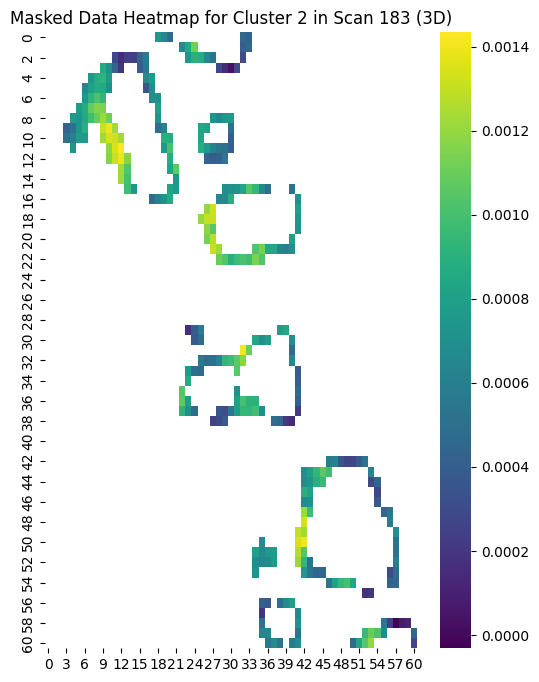

The mean value of the masked data for Cluster 2 in Scan 183 (3D) is: 7.4045e-04


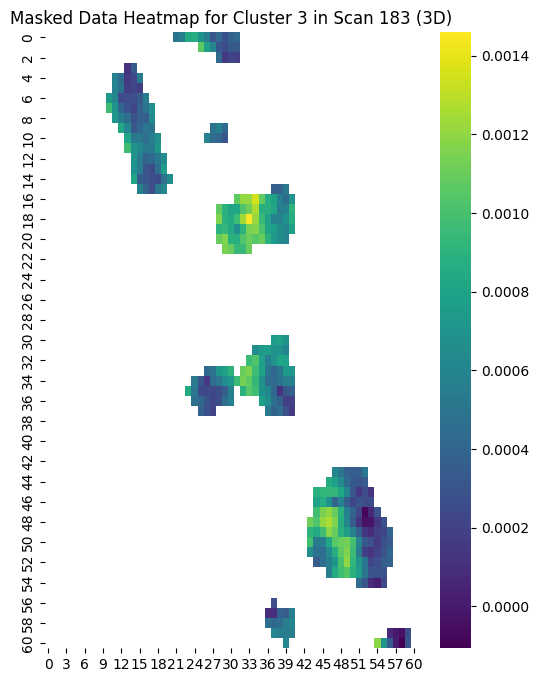

The mean value of the masked data for Cluster 3 in Scan 183 (3D) is: 5.9353e-04
Processing 5D data for scan 183...


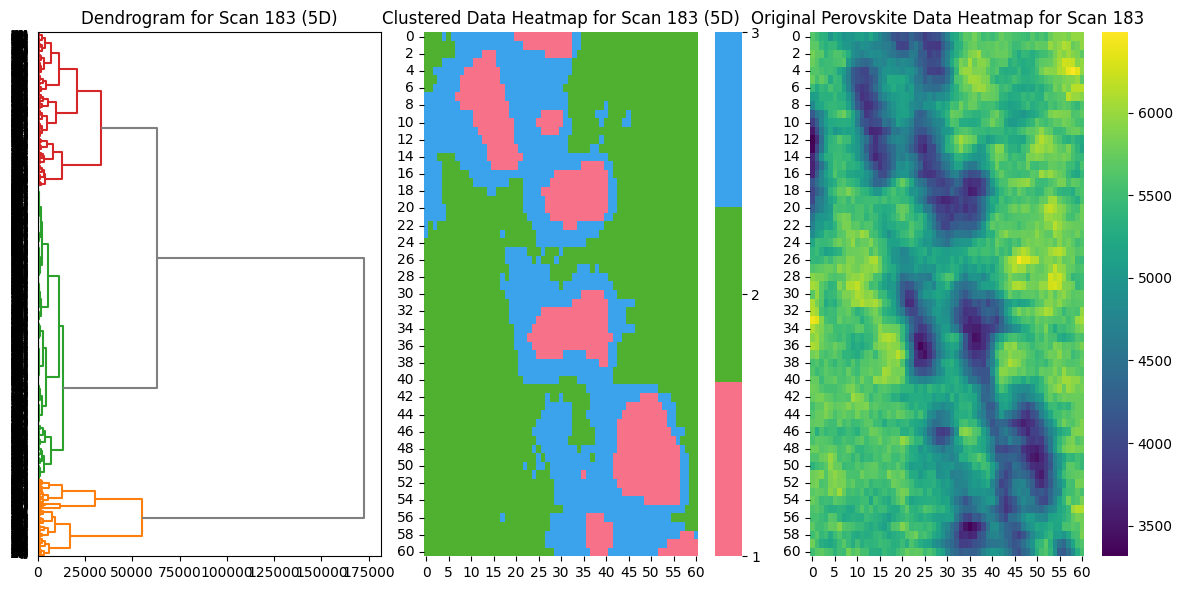

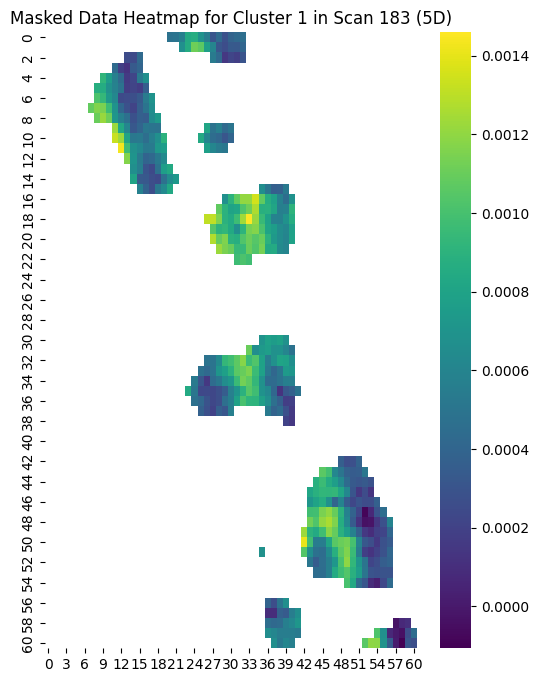

The mean value of the masked data for Cluster 1 in Scan 183 (5D) is: 6.2812e-04


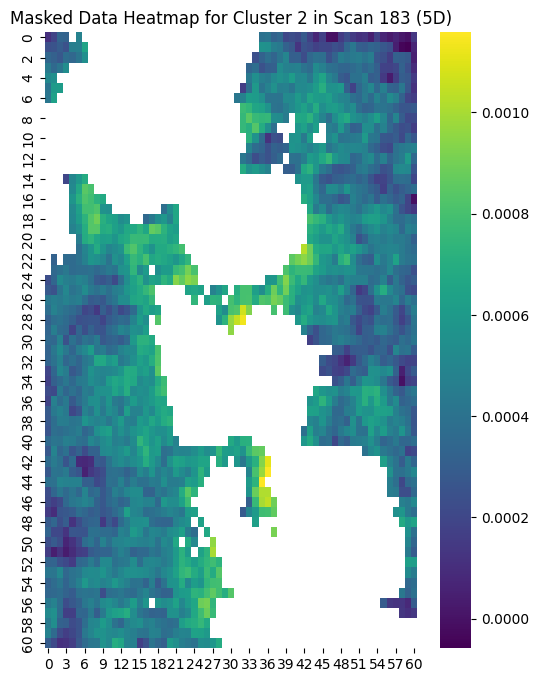

The mean value of the masked data for Cluster 2 in Scan 183 (5D) is: 4.6681e-04


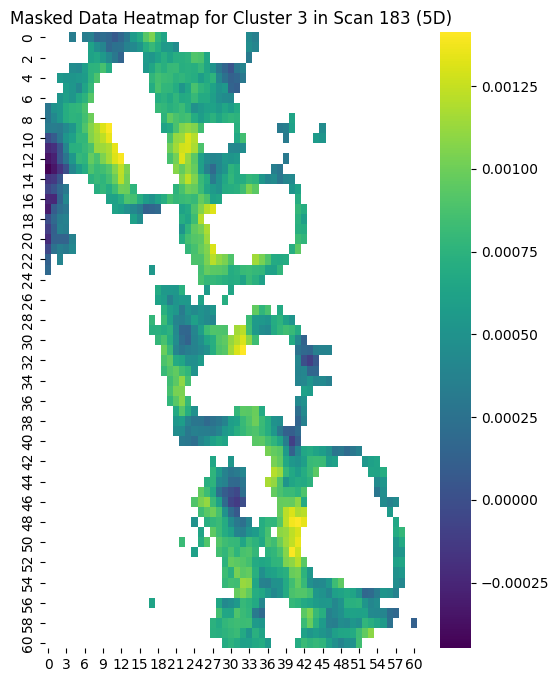

The mean value of the masked data for Cluster 3 in Scan 183 (5D) is: 6.4702e-04
Processing 3D data for scan 185...


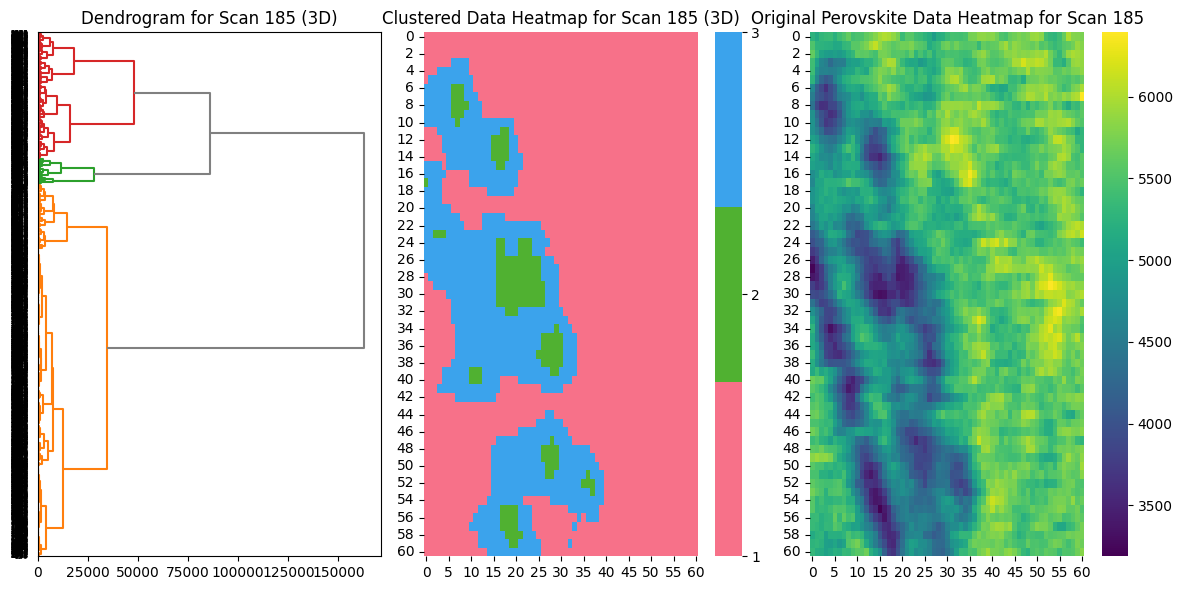

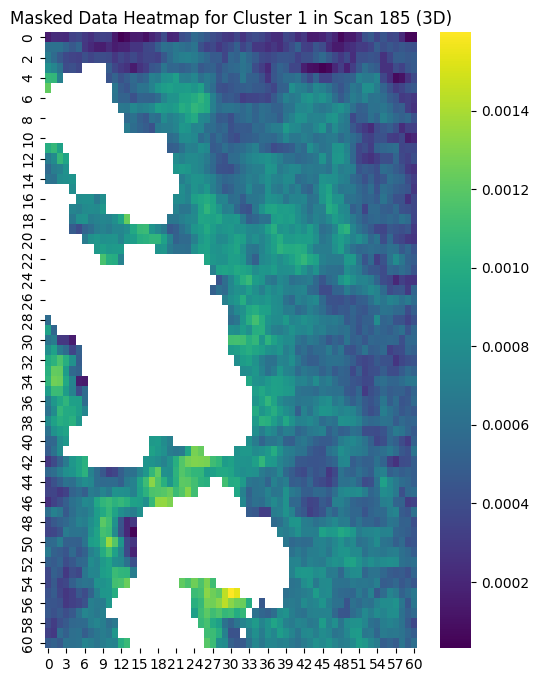

The mean value of the masked data for Cluster 1 in Scan 185 (3D) is: 6.5028e-04


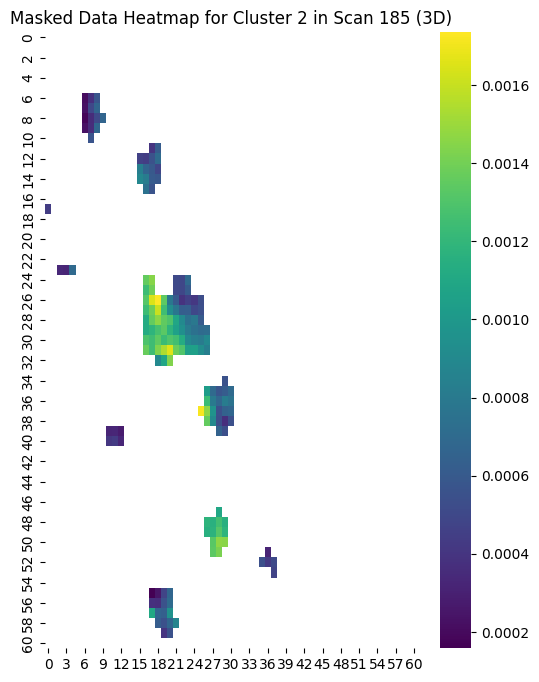

The mean value of the masked data for Cluster 2 in Scan 185 (3D) is: 8.3862e-04


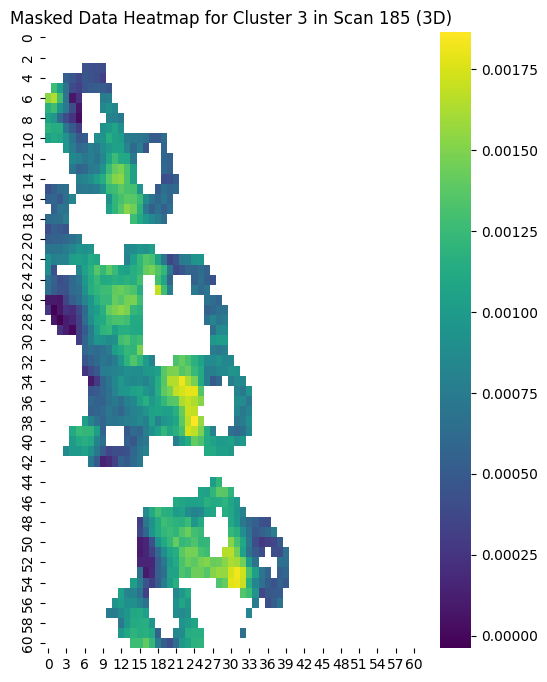

The mean value of the masked data for Cluster 3 in Scan 185 (3D) is: 9.0137e-04
Processing 5D data for scan 185...


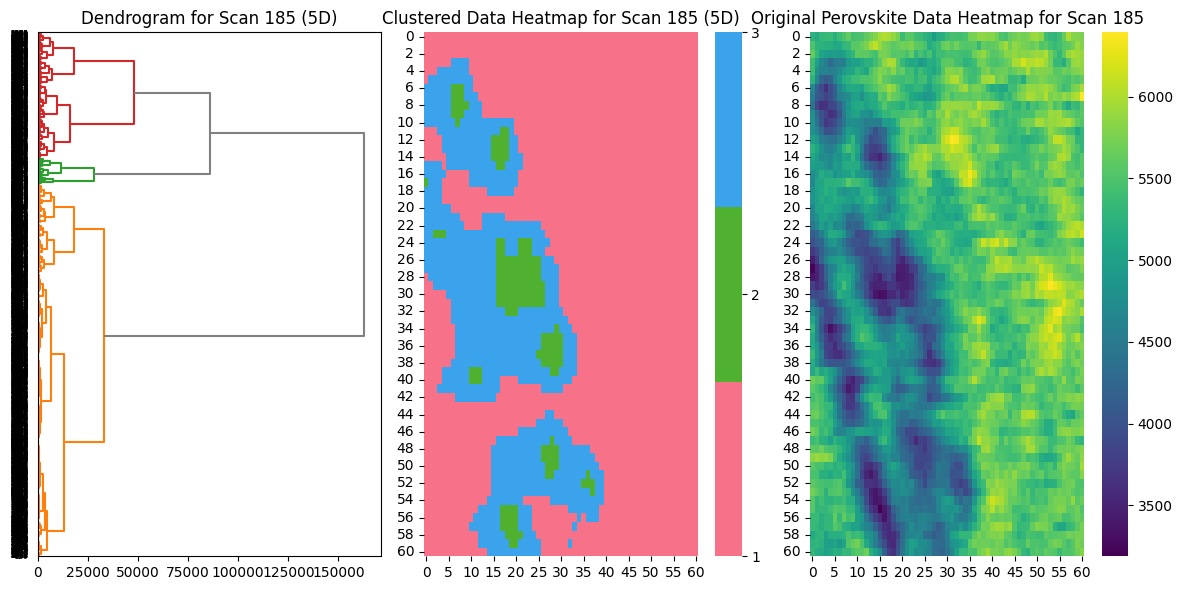

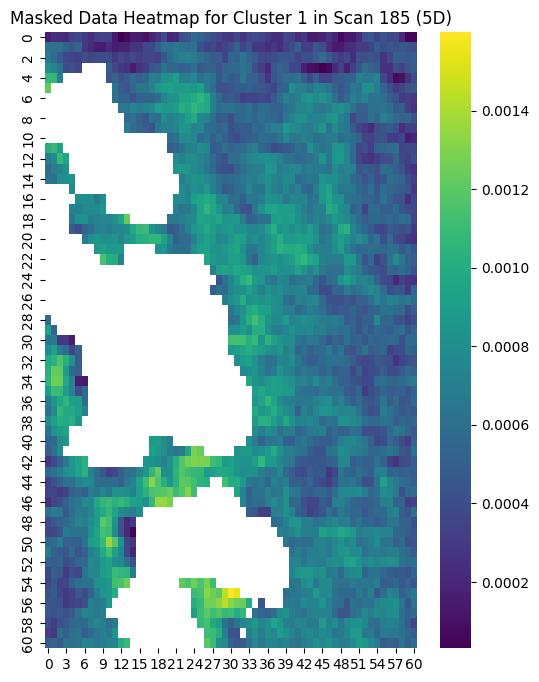

The mean value of the masked data for Cluster 1 in Scan 185 (5D) is: 6.5028e-04


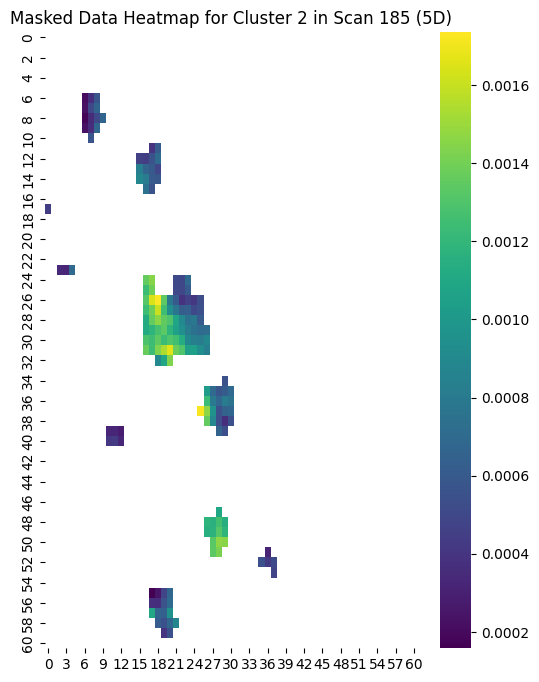

The mean value of the masked data for Cluster 2 in Scan 185 (5D) is: 8.3862e-04


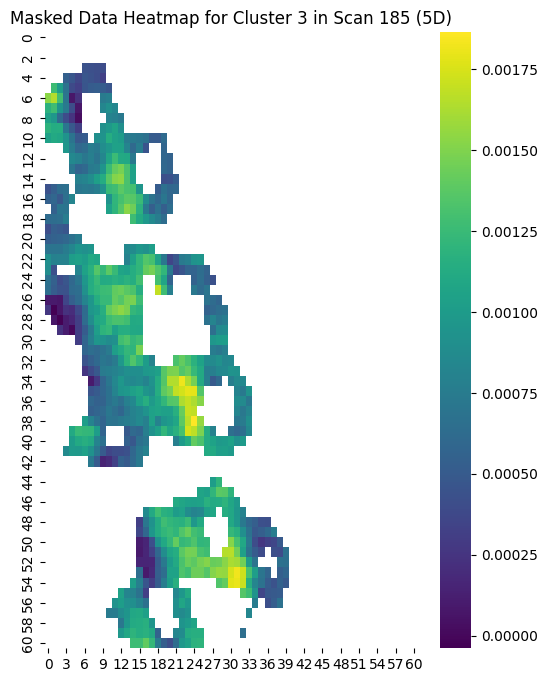

The mean value of the masked data for Cluster 3 in Scan 185 (5D) is: 9.0137e-04
Processing 3D data for scan 189...


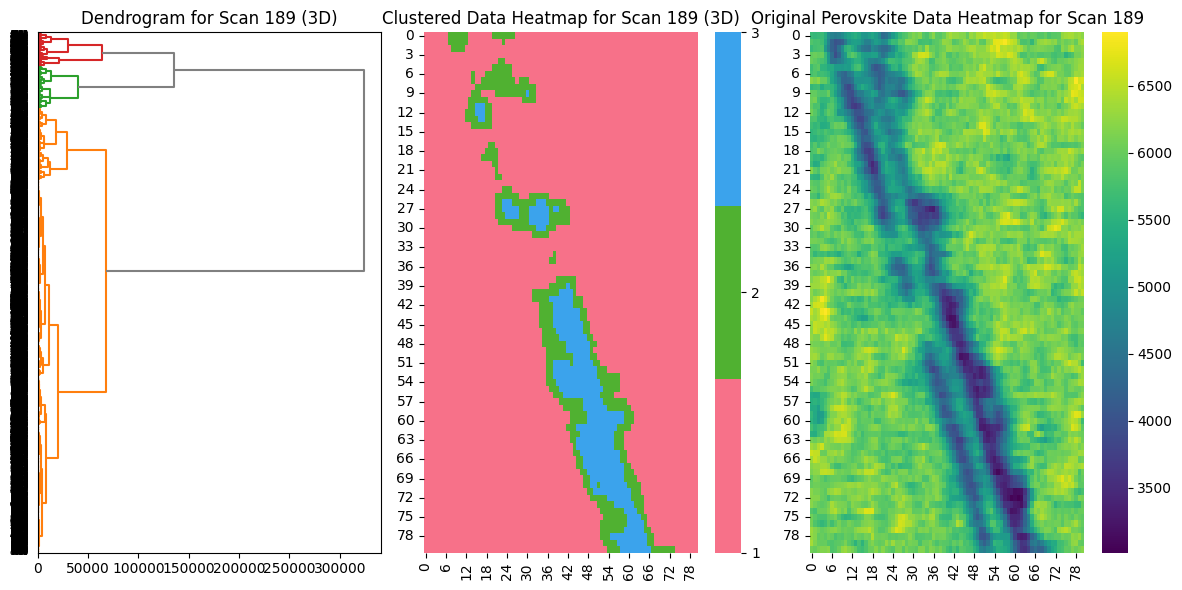

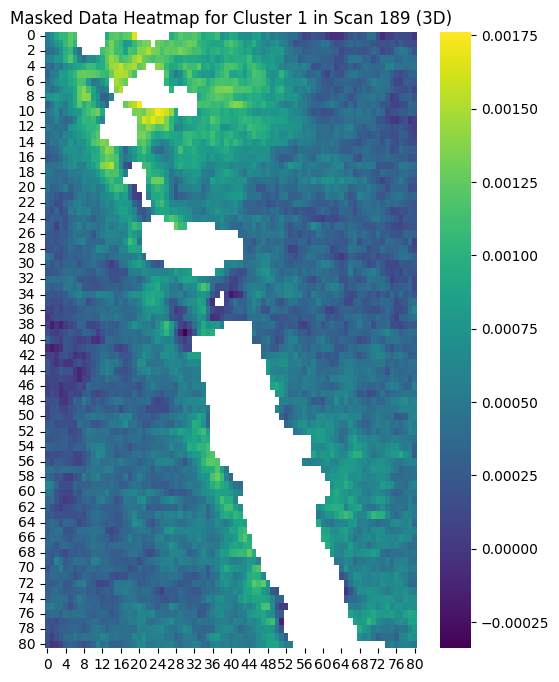

The mean value of the masked data for Cluster 1 in Scan 189 (3D) is: 5.1563e-04


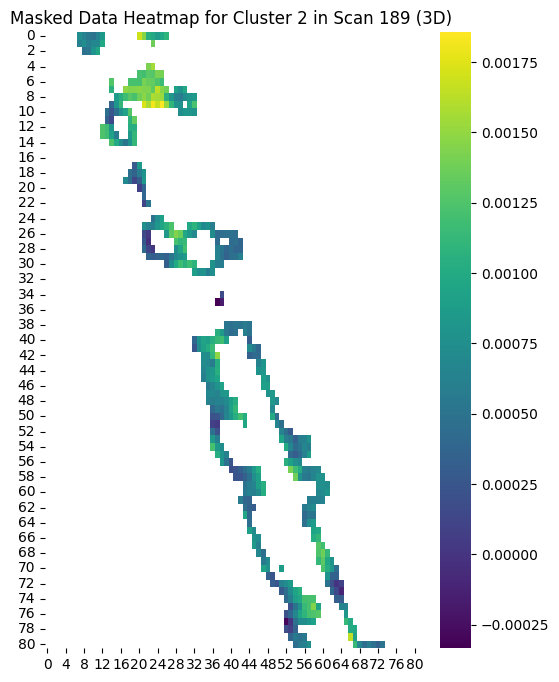

The mean value of the masked data for Cluster 2 in Scan 189 (3D) is: 7.6034e-04


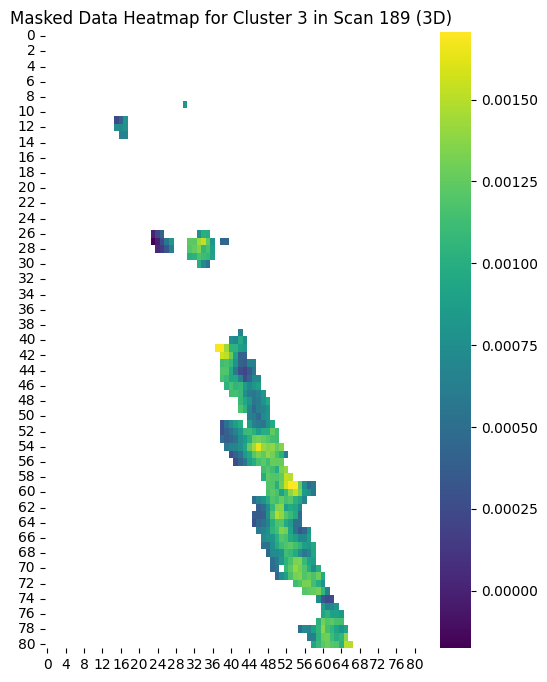

The mean value of the masked data for Cluster 3 in Scan 189 (3D) is: 9.1569e-04
Processing 5D data for scan 189...


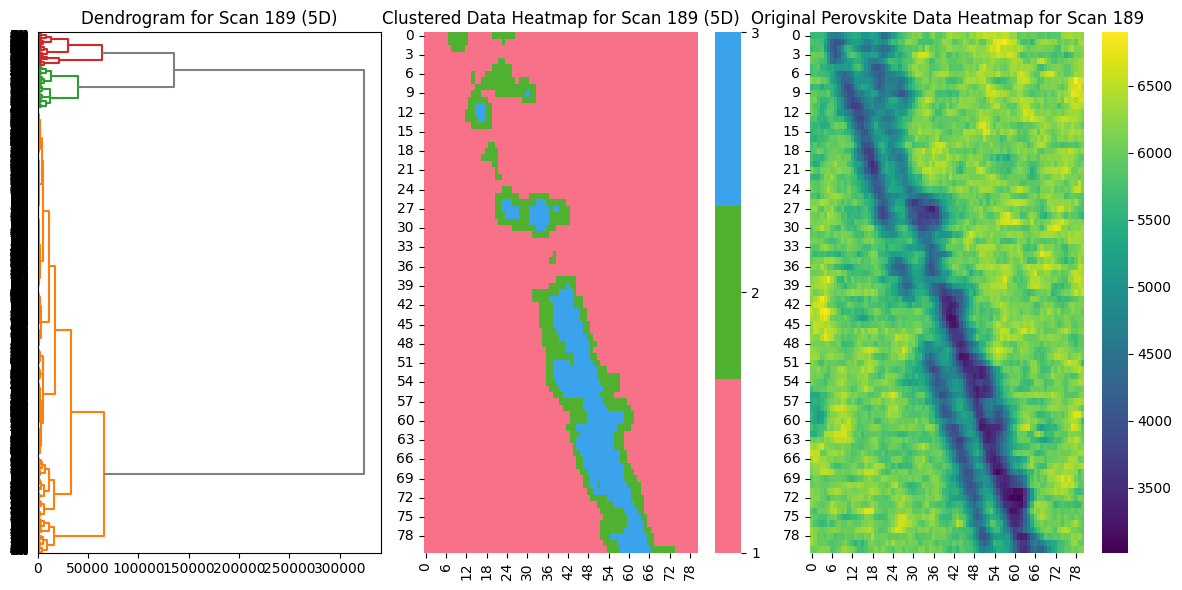

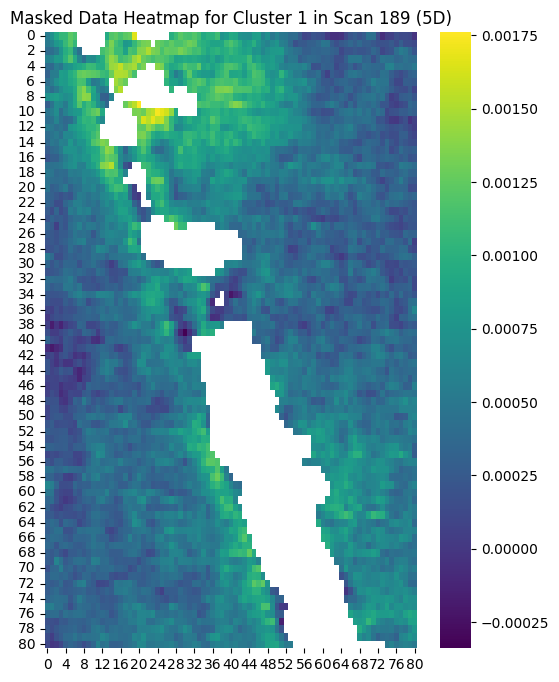

The mean value of the masked data for Cluster 1 in Scan 189 (5D) is: 5.1563e-04


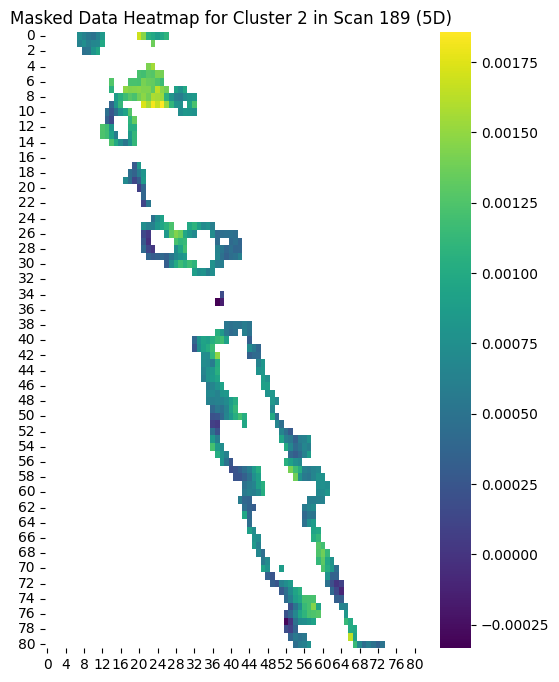

The mean value of the masked data for Cluster 2 in Scan 189 (5D) is: 7.6034e-04


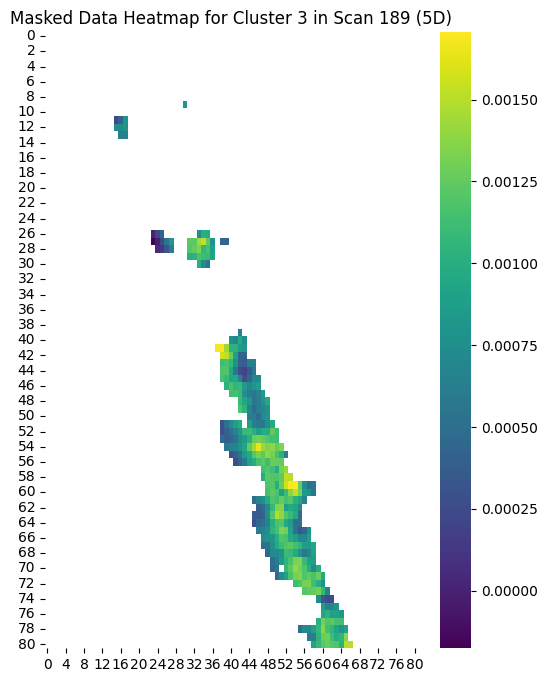

The mean value of the masked data for Cluster 3 in Scan 189 (5D) is: 9.1569e-04


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

scans = [125, 126, 142, 183, 185, 189]

for scan in scans:
    for dimensions in [3, 5]:
        print(f"Processing {dimensions}D data for scan {scan}...")
        base_path = f'D:\\Kukreja\\CSV Figs\\Scan {scan}\\'
        P_File = base_path + f'Scan {scan} Perovskite.csv'
        BM_File = base_path + f'Scan {scan} BrownMillerite.csv'
        LP_File = base_path + f'Scan {scan} Strain.csv'
        X_File = base_path + f'Scan {scan} XData.csv' if dimensions == 5 else None
        Y_File = base_path + f'Scan {scan} YData.csv' if dimensions == 5 else None

        data_Perov = pd.read_csv(P_File, header=None)
        data_BrownM = pd.read_csv(BM_File, header=None)
        data_Strain = pd.read_csv(LP_File, header=None)
        data_XData = pd.read_csv(X_File, header=None) if dimensions == 5 else None
        data_YData = pd.read_csv(Y_File, header=None) if dimensions == 5 else None

        data_arrays = [data_Perov.values.flatten(), data_BrownM.values.flatten(), data_Strain.values.flatten()]
        if dimensions == 5:
            data_arrays.extend([data_XData.values.flatten(), data_YData.values.flatten()])
        AllData = np.column_stack(data_arrays)

        linked = linkage(AllData, method='ward')
        num_clusters = 3
        cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')
        cluster_labels_2d = cluster_labels.reshape(data_Perov.shape)

        plt.figure(figsize=(12, 6))

        plt.subplot(1, 3, 1)
        dendrogram(linked, color_threshold=linked[-(num_clusters-1), 2], orientation='right', above_threshold_color='gray')
        plt.title(f'Dendrogram for Scan {scan} ({dimensions}D)')

        plt.subplot(1, 3, 2)
        cmap = mcolors.ListedColormap(sns.color_palette("husl", num_clusters))
        sns.heatmap(cluster_labels_2d, cmap=cmap, cbar_kws={'ticks': range(1, num_clusters + 1)})
        plt.title(f'Clustered Data Heatmap for Scan {scan} ({dimensions}D)')

        plt.subplot(1, 3, 3)
        sns.heatmap(data_Perov, cmap='viridis')
        plt.title(f'Original Perovskite Data Heatmap for Scan {scan}')

        plt.tight_layout()
        plt.show()

        for cluster in range(1, num_clusters + 1):
            mask = (cluster_labels_2d == cluster)
            masked_data = np.where(mask, data_Strain, np.nan)
            
            plt.figure(figsize=(6, 8))
            sns.heatmap(masked_data, cmap='viridis')
            plt.title(f'Masked Data Heatmap for Cluster {cluster} in Scan {scan} ({dimensions}D)')
            plt.show()
            
            mean_value = np.nanmean(masked_data)
            print(f"The mean value of the masked data for Cluster {cluster} in Scan {scan} ({dimensions}D) is: {mean_value:.4e}")
